<a href="https://colab.research.google.com/github/EOHFA-GOAT/data-analytics-1/blob/master/World_Happiness_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

In this project, I will analyze 7 factors that may or may not correlate with world happiness. The data comes from a [2019 Kaggle dataset](https://www.kaggle.com/unsdsn/world-happiness) collected from the World Happiness Report, which is a landmark survey of the state of global happiness. In this project, the data ranges from the years 2015 to 2017. All of the data used for this analysis project can be found in the master branch of this repository.

In [0]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()

Saving World_Happiness_2015_2017.csv to World_Happiness_2015_2017.csv


In [3]:
# After uploading the file, we are able to see the name of the file saved as "World_Happiness_2015_2017.csv"
# Use pd.read_csv() to read the file and assign it to variable call "data"
data = pd.read_csv('World_Happiness_2015_2017.csv')

# We then use data.head() to see the first 5 rows of data
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [4]:
# Look into shape using data.shape(). This will tell me how many rows and columns there are.
data.shape

(470, 11)

In [5]:
# Now lets see data types using data.dtypes
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [6]:
# Now lets change the data type of country from int to float 
data['Year'] = data['Year'].astype('float')
# Now let's check if we did it right
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

In [7]:
# Have a look at data
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015.0


In [8]:
# Yikes! Year in decimals! Let's change it back to int!
data['Year'] = data['Year'].astype('int')
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [9]:
# Lets calculate the number of null values
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

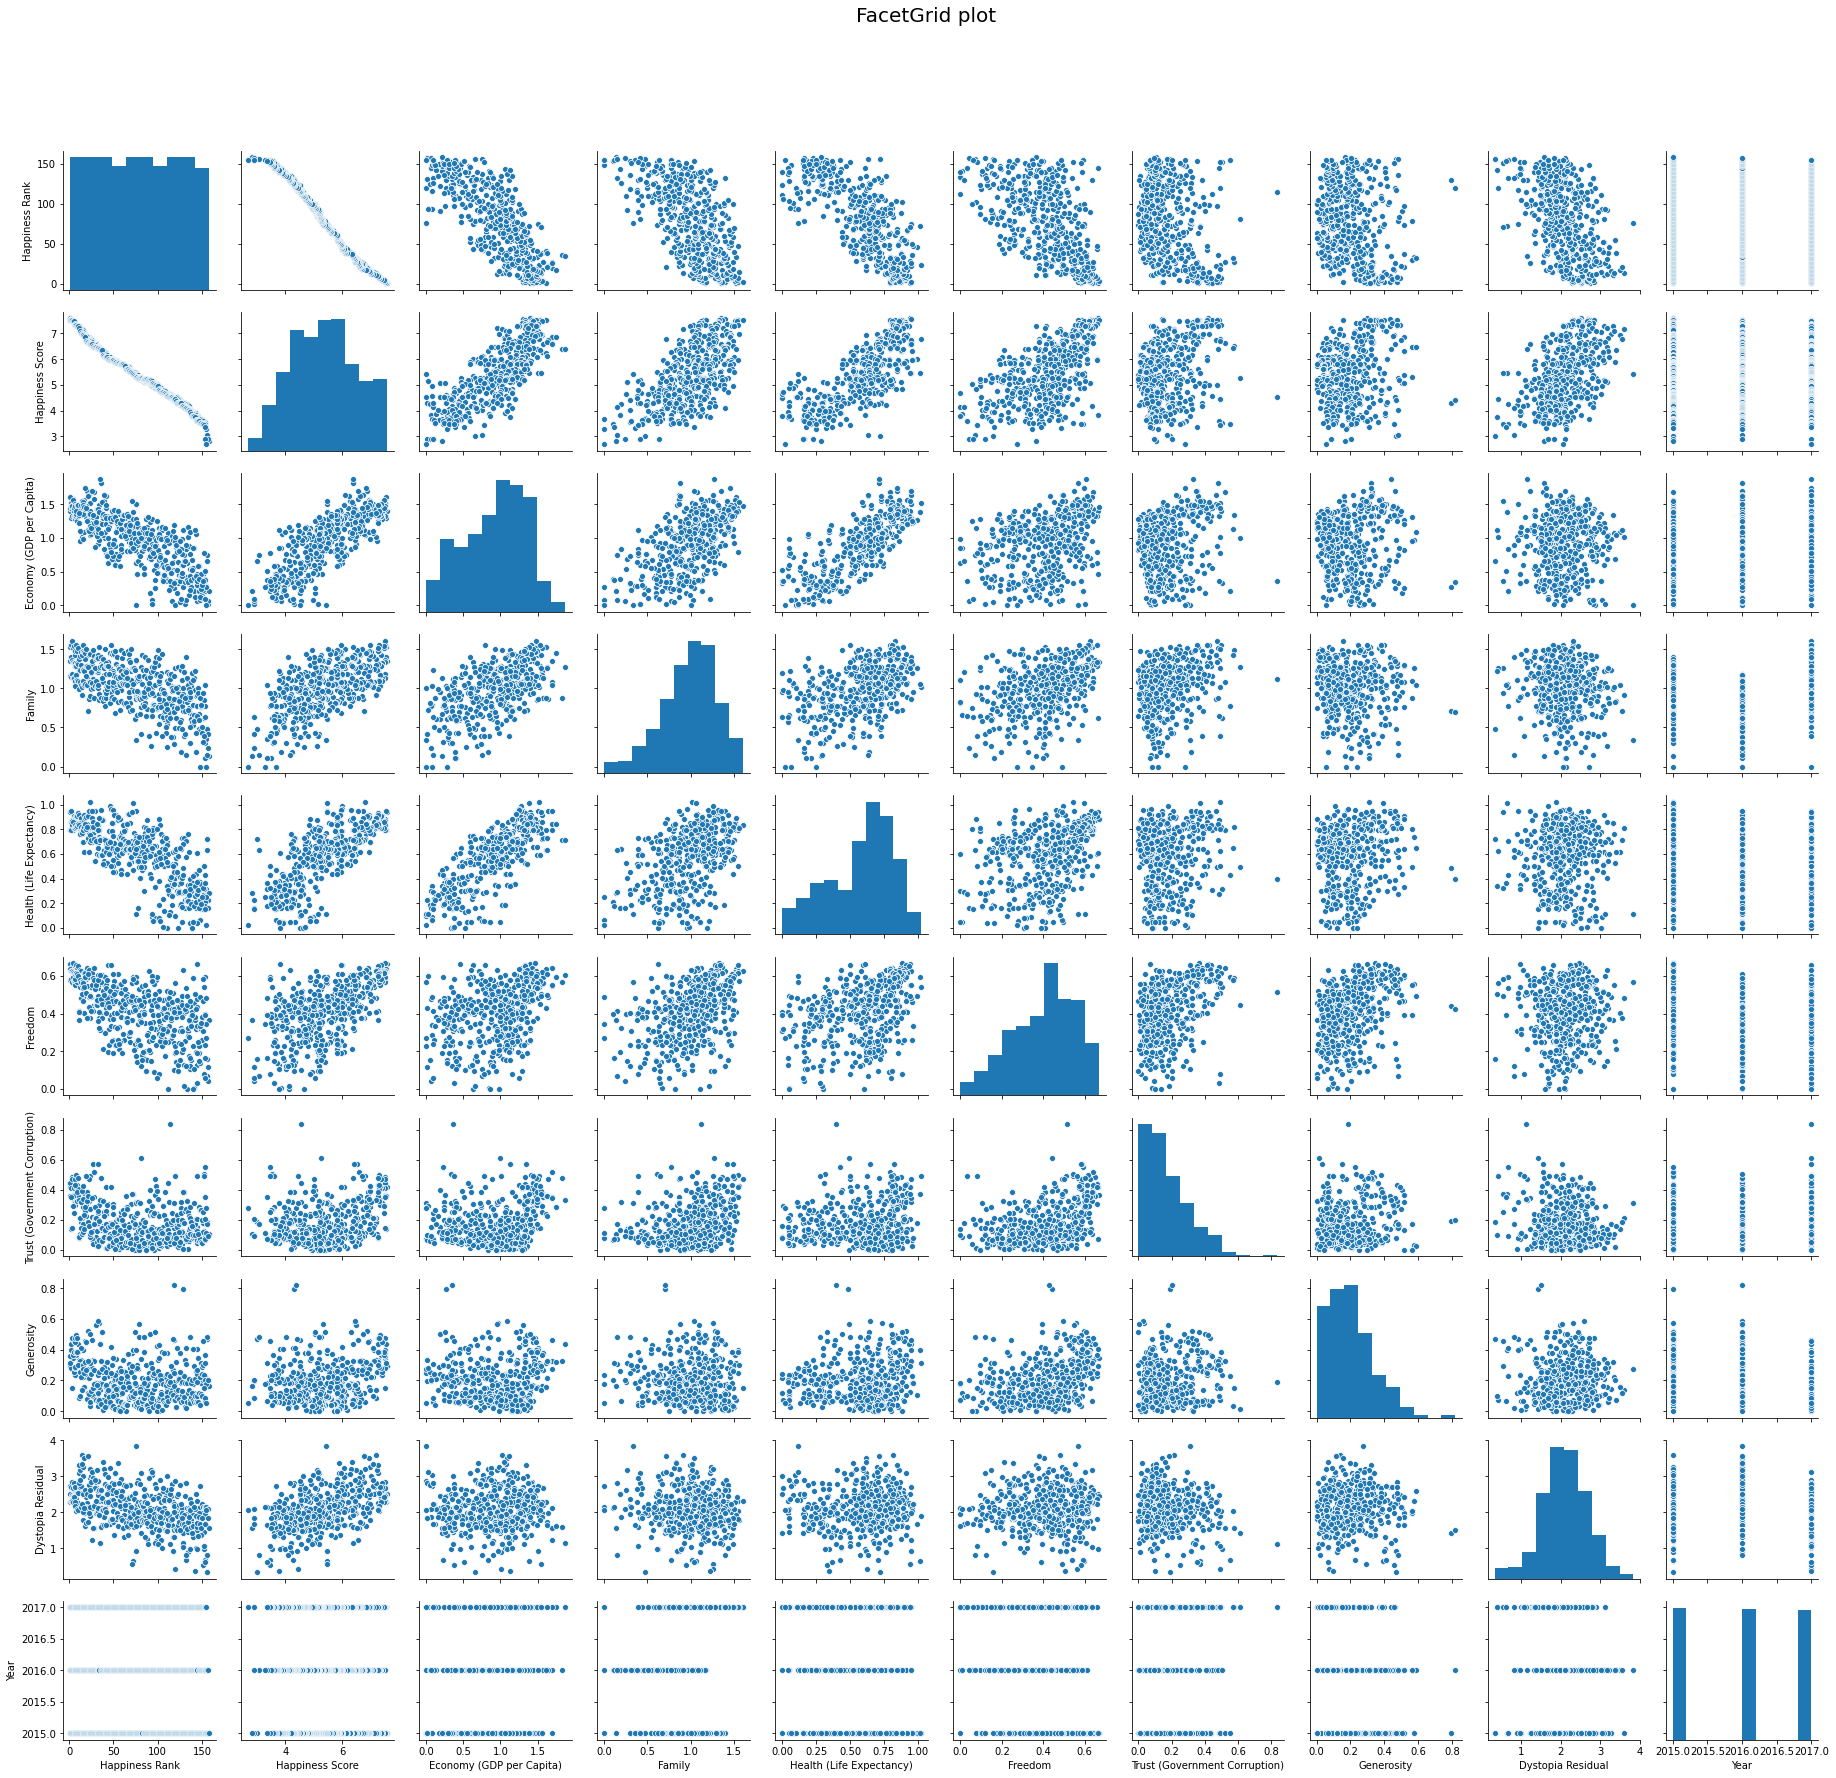

In [10]:
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [11]:
# Creating a list of attributes we want (just copy the column name)
econ_happiness = ['Happiness Score','Economy (GDP per Capita)']

# Creating a dataframe that only contains these attributes
econ_corr = data[econ_happiness]

# Finding correlation
econ_corr.corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.00000,0.78545
Economy (GDP per Capita),0.78545,1.00000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

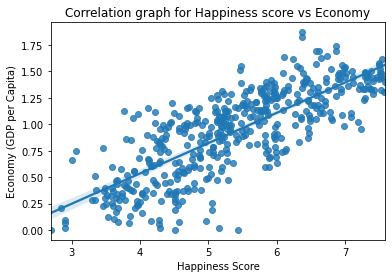

In [12]:
sns.regplot(data = econ_corr, x = 'Happiness Score', y = 'Economy (GDP per Capita)').set_title("Correlation graph for Happiness score vs Economy")

r^2 = 0.62. This is a strong correlation! In context, this makes a lot of sense, because the data shows that the greater the GDP per Capita, the greater the happiness score. Given the effects that money give when people have it, of course people would be happy with more money. If I may say, the data suggests that money really does "buy" happiness.

In [13]:
#family
fam_happiness = ['Happiness Score','Family']

fam_corr = data[fam_happiness]

fam_corr.corr()

,Happiness Score,Family
Happiness Score,1.000000,0.636532
Family,0.636532,1.000000


Text(0.5, 1.0, "Emini's Correlation graph for Happiness score vs Family")

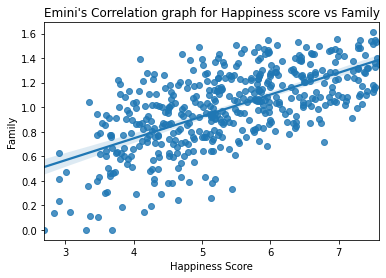

In [14]:
#family plot
sns.regplot(data = fam_corr, x = 'Happiness Score', y = 'Family').set_title("Emini's Correlation graph for Happiness score vs Family")

r^2 = .41. A somewhat correlated graph, it suggests that family and happiness indeed go together. It is understandable that being around family can make people happier. However, given the many outliers, one cannot assume that happiness is always dependent upon family. Let us continue to see if other vairables that have a strong correlation with happiness! 

In [15]:
#Health
health_happiness = ['Health (Life Expectancy)','Happiness Score']

health_corr = data[health_happiness]

health_corr.corr()

,Health (Life Expectancy),Happiness Score
Health (Life Expectancy),1.00000,0.74804
Happiness Score,0.74804,1.00000


Text(0.5, 1.0, "Emini's Correlation graph for Happiness score vs Health")

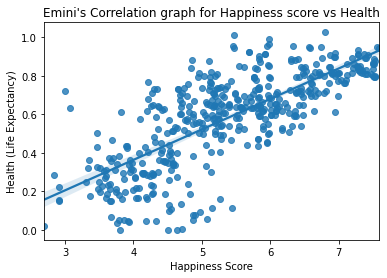

In [16]:
#health plot
sns.regplot(data = health_corr, x = 'Happiness Score', y = 'Health (Life Expectancy)').set_title("Emini's Correlation graph for Happiness score vs Health")

This is more correlated, leaning towards a strong correlation with a r^2 value of .56, compared to Family's r^2 value of .40. It is good to know that Happiness is dependent upon health! It can be concluded that healthy people can live life to it's extent which generally makes them happier.

In [17]:
#Freedom
freedom_happiness = ['Freedom', 'Happiness Score']

freedom_corr = data[freedom_happiness]

freedom_corr.corr()

,Freedom,Happiness Score
Freedom,1.000000,0.560353
Happiness Score,0.560353,1.000000


Text(0.5, 1.0, "Emini's Correlation graph for Happiness score vs Freedom")

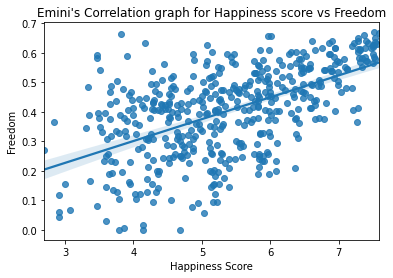

In [18]:
#Freedom Plot
sns.regplot(data = freedom_corr, x = 'Happiness Score', y = 'Freedom').set_title("Emini's Correlation graph for Happiness score vs Freedom")

r^2 = 0.31. Weak correlation between Happiness and Freedom. This certainly tells us that happiness does not depend on one's freedom.

In [19]:
#Trust (Gov. Corruption)
trust_happiness = ['Trust (Government Corruption)','Happiness Score']

trust_corr = data[trust_happiness]

trust_corr.corr()

,Trust (Government Corruption),Happiness Score
Trust (Government Corruption),1.00000,0.28213
Happiness Score,0.28213,1.00000


Text(0.5, 1.0, "Emini's Correlation graph for Happiness score vs Gov. Corruption")

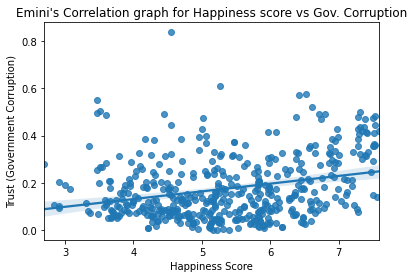

In [20]:
#Trust Plot
sns.regplot(data = trust_corr, x = 'Happiness Score', y = 'Trust (Government Corruption)').set_title("Emini's Correlation graph for Happiness score vs Gov. Corruption")

r^2 = .08. This is a very weak correlation. Thankfully, this is great, because data shows that most people don't think that government corruption makes them happy. Less government corruption is clustered at a higher-end happiness score, which is a good thing.

In [21]:
#Generosity
gen_happiness = ['Generosity','Happiness Score']

gen_corr = data[gen_happiness]

gen_corr.corr()

,Generosity,Happiness Score
Generosity,1.000000,0.221684
Happiness Score,0.221684,1.000000


Text(0.5, 1.0, "Emini's Correlation graph for Happiness score vs Generosity")

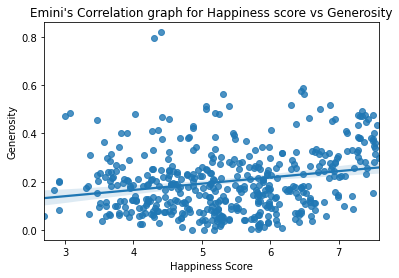

In [22]:
#Geneoristy Plot
sns.regplot(data = gen_corr, x = 'Happiness Score', y = 'Generosity').set_title("Emini's Correlation graph for Happiness score vs Generosity")

r^2 = 0.05. This very weak correlation is weaker than government corruption's correlation. In context of the data, it seems as though the more generous someone is, the less likeley they find happiness. This is clearly an issue. There must be ways that society can implement to promote this seemingly negative morale. You would think that being generous promotes happiness. Despite this thinking, the data shows otherwise. Let's fix this!

In [23]:
#Dystopia
dyst_happiness = ['Dystopia Residual','Happiness Score']

dyst_corr = data[dyst_happiness]

dyst_corr.corr()

,Dystopia Residual,Happiness Score
Dystopia Residual,1.000000,0.489747
Happiness Score,0.489747,1.000000


Text(0.5, 1.0, "Emini's Correlation graph for Happiness score vs Dystopia Residual")

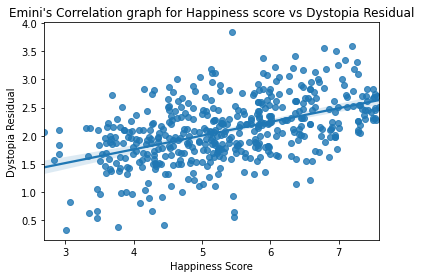

In [24]:
#Distopia Plot
sns.regplot(data = dyst_corr, x = 'Happiness Score', y = 'Dystopia Residual').set_title("Emini's Correlation graph for Happiness score vs Dystopia Residual")

r^2 = .24. As you may have guessed, not well correlated, but the data does show something interesting. Generally, as the happinesss score increases, the dystopia residual increases as well. While there are many outliers (thankfully), this produces another problem. WHY IS HAPPINESS INCREASING AS DYSTOPIA RESIDUALS INCREASING??? In other words, dystopian-like behavior is causing happiness. NOT GOOD. This shows that society is changing the way it thinks about happiness. This is a great reason to be afraid for the future of the world.

**CONCLUSION**

I hope that you all have enjoyed my first real-world analysis project! I've never done this before, and I have indeed learned some interesting things while doing it. I hope that you all have learned something too! Analyses like these are very important when thinking about how we could make the world a better place. As humans, it is our job to create a functional environment in which all people can be happy. After reading this analysis project, I want you all to think of ways on how society can better itself so that life-long happiness is given to everyone.

Thanks,

Emini Offutt, High School Junior

16 March 2020
